In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class BayesianBandit:
  def __init__(self, m):
    self.m = m
    # parameters for mu - prior is N(0,1)
    self.m0 = 0
    self.lambda0 = 1
    self.sum_x = 0 # for convenience
    self.tau = 1

  def pull(self):
    return np.random.randn() + self.m

  def sample(self):
    return np.random.randn() / np.sqrt(self.lambda0) + self.m0

  def update(self, x):
    # assume tau is 1
    self.lambda0 += 1
    self.sum_x += x
    self.m0 = self.tau*self.sum_x / self.lambda0


In [11]:
def run_experiment(m1, m2, m3, N):
  bandits = [BayesianBandit(m1), BayesianBandit(m2), BayesianBandit(m3)]

  data = np.empty(N)
  
  for i in range(N):
    # optimistic initial values
    j = np.argmax([b.sample() for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  return cumulative_average

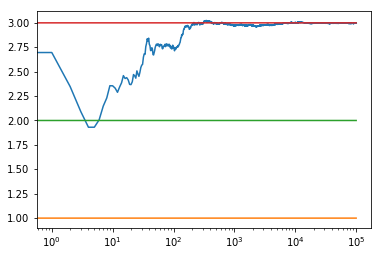

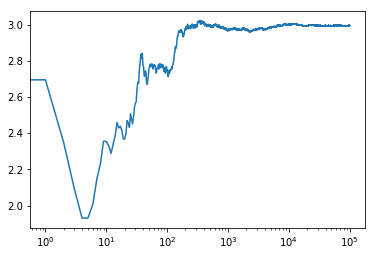

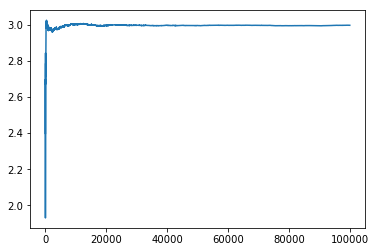

In [12]:
bayes = run_experiment(1.0, 2.0, 3.0, 100000)

# log scale plot
plt.plot(bayes, label='bayesian')

plt.xscale('log')
plt.show()


# linear plot
plt.plot(bayes, label='bayesian')

plt.show()
